<a href="https://colab.research.google.com/github/AparajitPandit/logistic_model-on-diabetes-prediction/blob/main/logistic_model_on_diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**here we go again**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataframe=pd.read_csv("/content/diabetes.csv")

In [ ]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


outcome is our target column

In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


wait a second

In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


how can someone have 0 bp or skin thickness it doesnt make any sense right?

we need to ampute such nonsense data from the dataframe


so lets get started with eda ops

In [ ]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


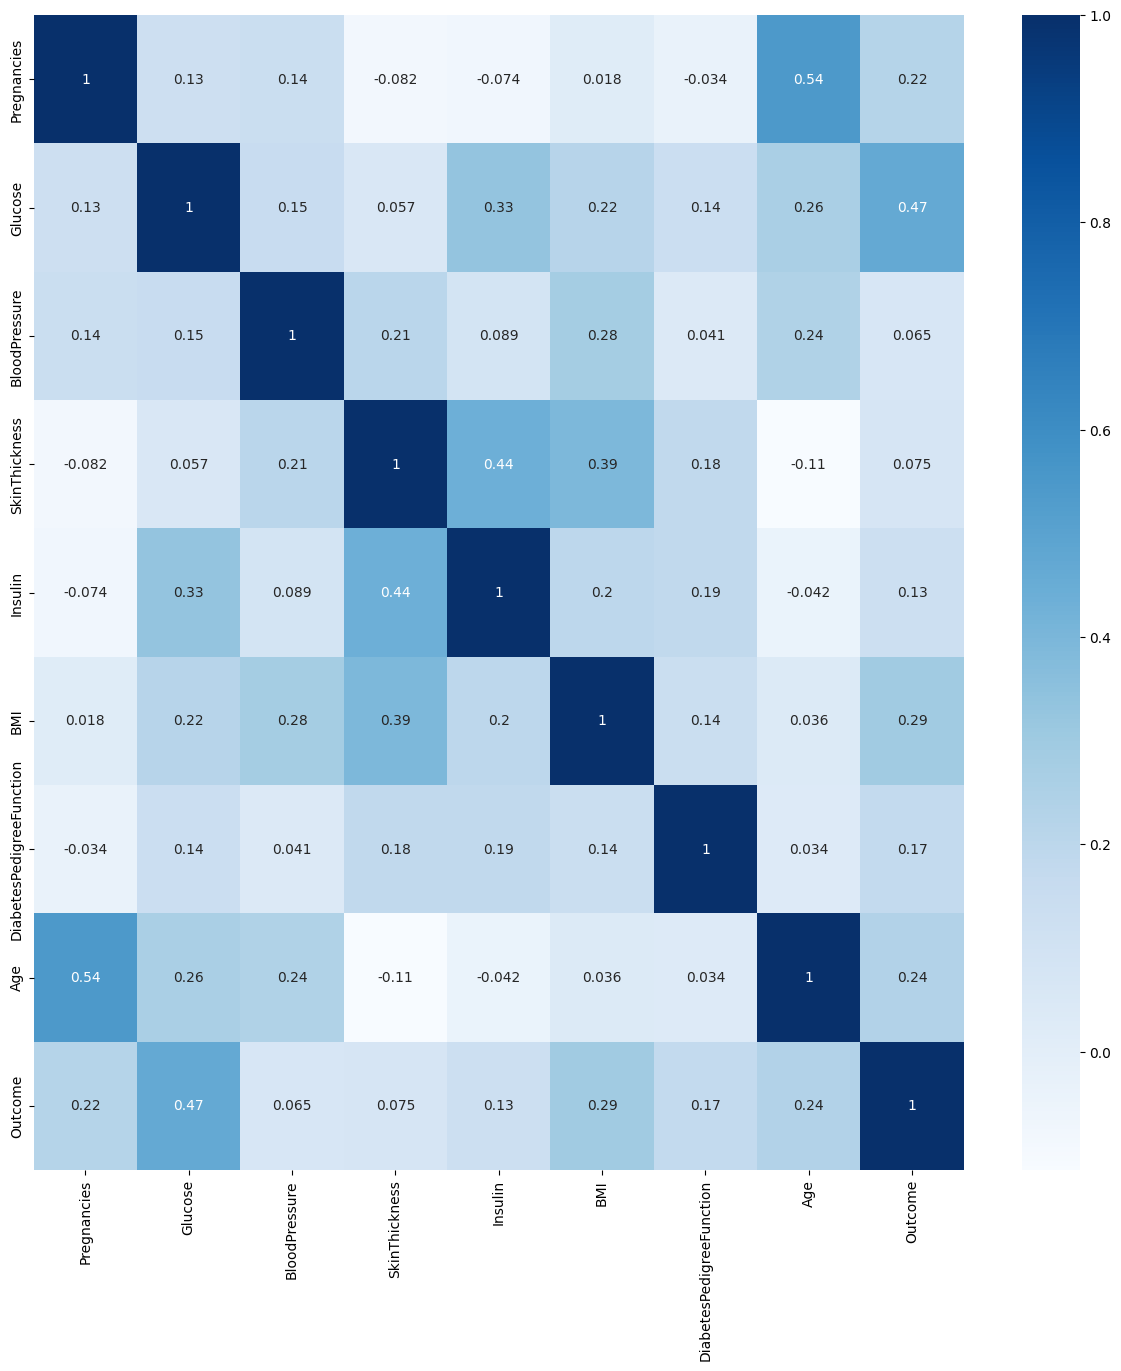

In [ ]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(dataframe.corr(),annot=True,cmap="Blues")
plt.savefig("heatmap.png")
plt.show()

In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/tmp/ipython-input-13-303242595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

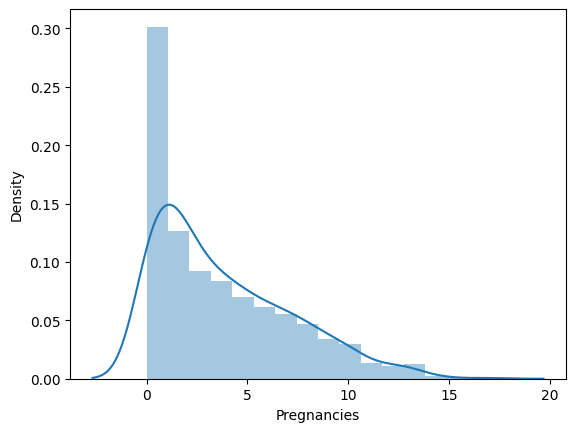

In [ ]:
sns.distplot(dataframe["Pregnancies"])

/tmp/ipython-input-14-2421775037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe["BloodPressure"])


<Axes: xlabel='BloodPressure', ylabel='Density'>

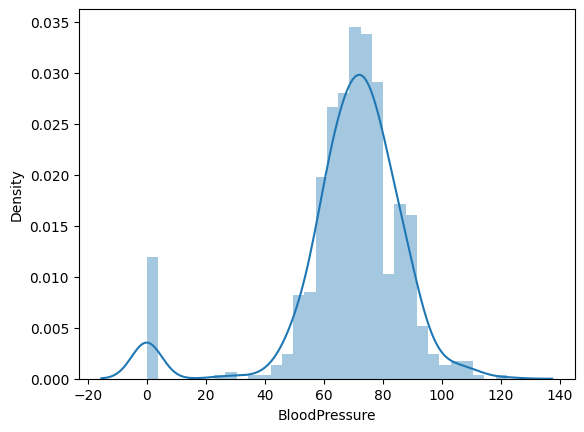

In [ ]:
sns.distplot(dataframe["BloodPressure"])

In [ ]:
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].mean())

In [ ]:
dataframe['Insulin']

,Insulin
0,79.799479
1,79.799479
2,79.799479
3,94.000000
4,168.000000
...,...
763,180.000000
764,79.799479
765,112.000000
766,79.799479


In [ ]:
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].mean())

In [ ]:
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())

In [ ]:
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].mean())

In [ ]:
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].median())

In [ ]:
dataframe['DiabetesPedigreeFunction']=dataframe['DiabetesPedigreeFunction'].replace(0,dataframe['DiabetesPedigreeFunction'].median())

In [ ]:
dataframe['Age']=dataframe['Age'].replace(0,dataframe['Age'].median())

i think 0 pregnancies are ok because someone can also be a man right?

In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125,96.000000,20.536458,79.799479,31.992578,0.232,54,1


lets remove outliers

so first we have to detect them

In [ ]:
X=dataframe.drop("Outcome",axis=1)
Y=dataframe['Outcome']

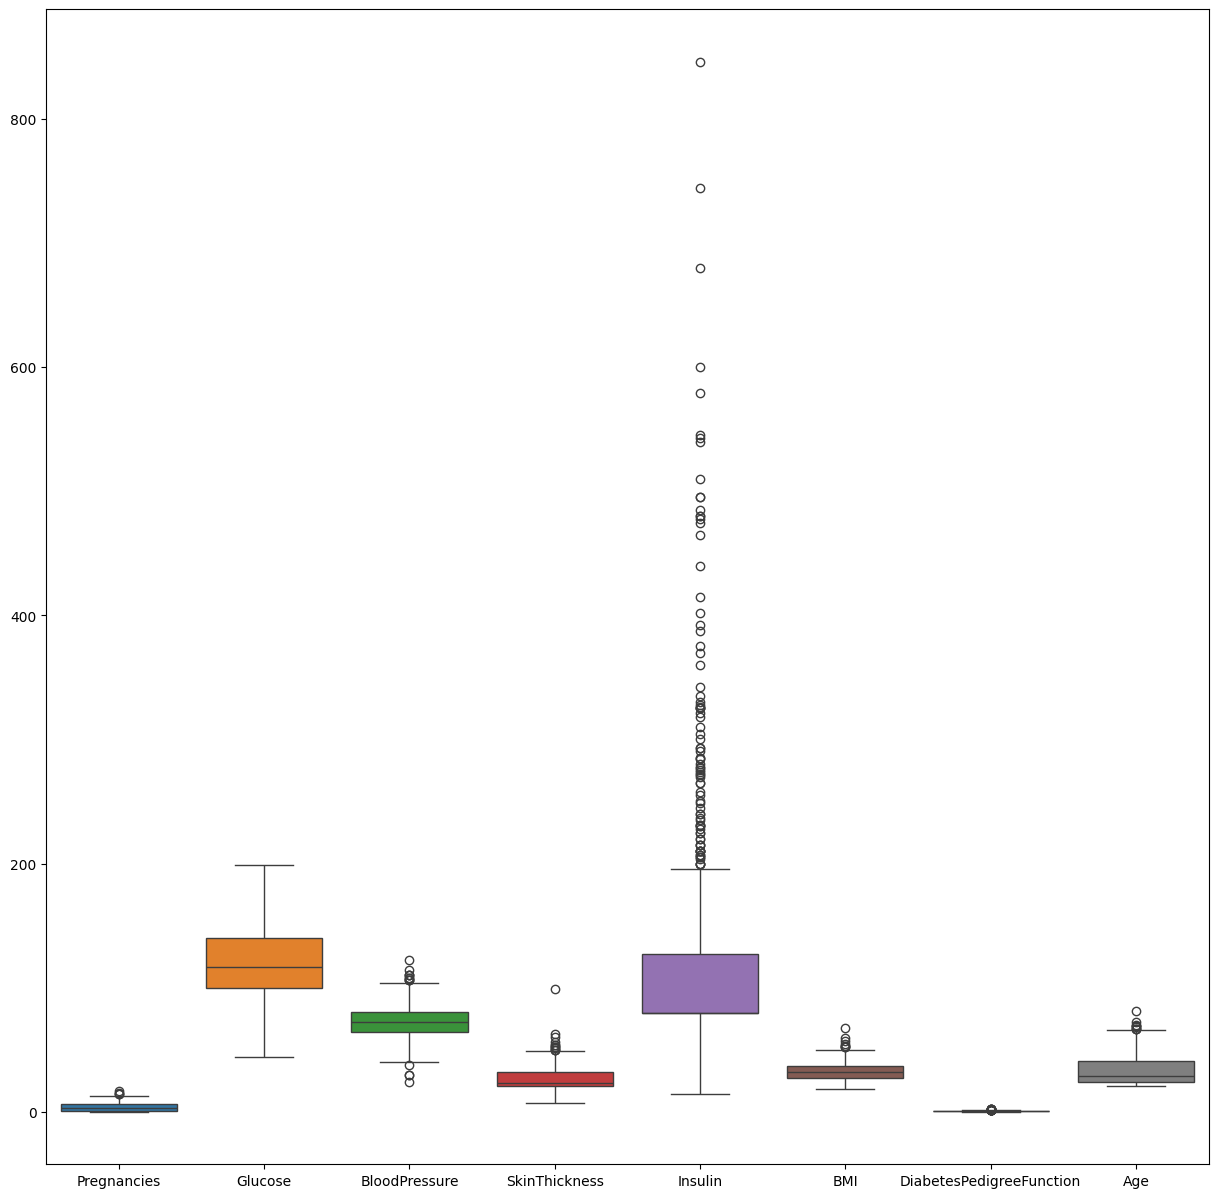

In [ ]:
fig, ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X, ax=ax)
plt.savefig("boxplot.jpg")
plt.show()

In [ ]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
  q1=dataframe[col].quantile(0.25)
  q3=dataframe[col].quantile(0.75)
  iqr=q3-q1
  upper_whisker=q3+1.5*iqr
  lower_whisker=q1-1.5*iqr
  mask=(dataframe[col]>upper_whisker) & (dataframe[col]<lower_whisker)

outliers detected datapoints rejected

In [ ]:
X_outlierdetction=X[~mask]
Y_outlierdetction=Y[~mask]

In [ ]:
X_outlierdetction.shape

(768, 8)

In [ ]:
Y_outlierdetction.shape

(768,)

lets scale up this

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlierdetction)

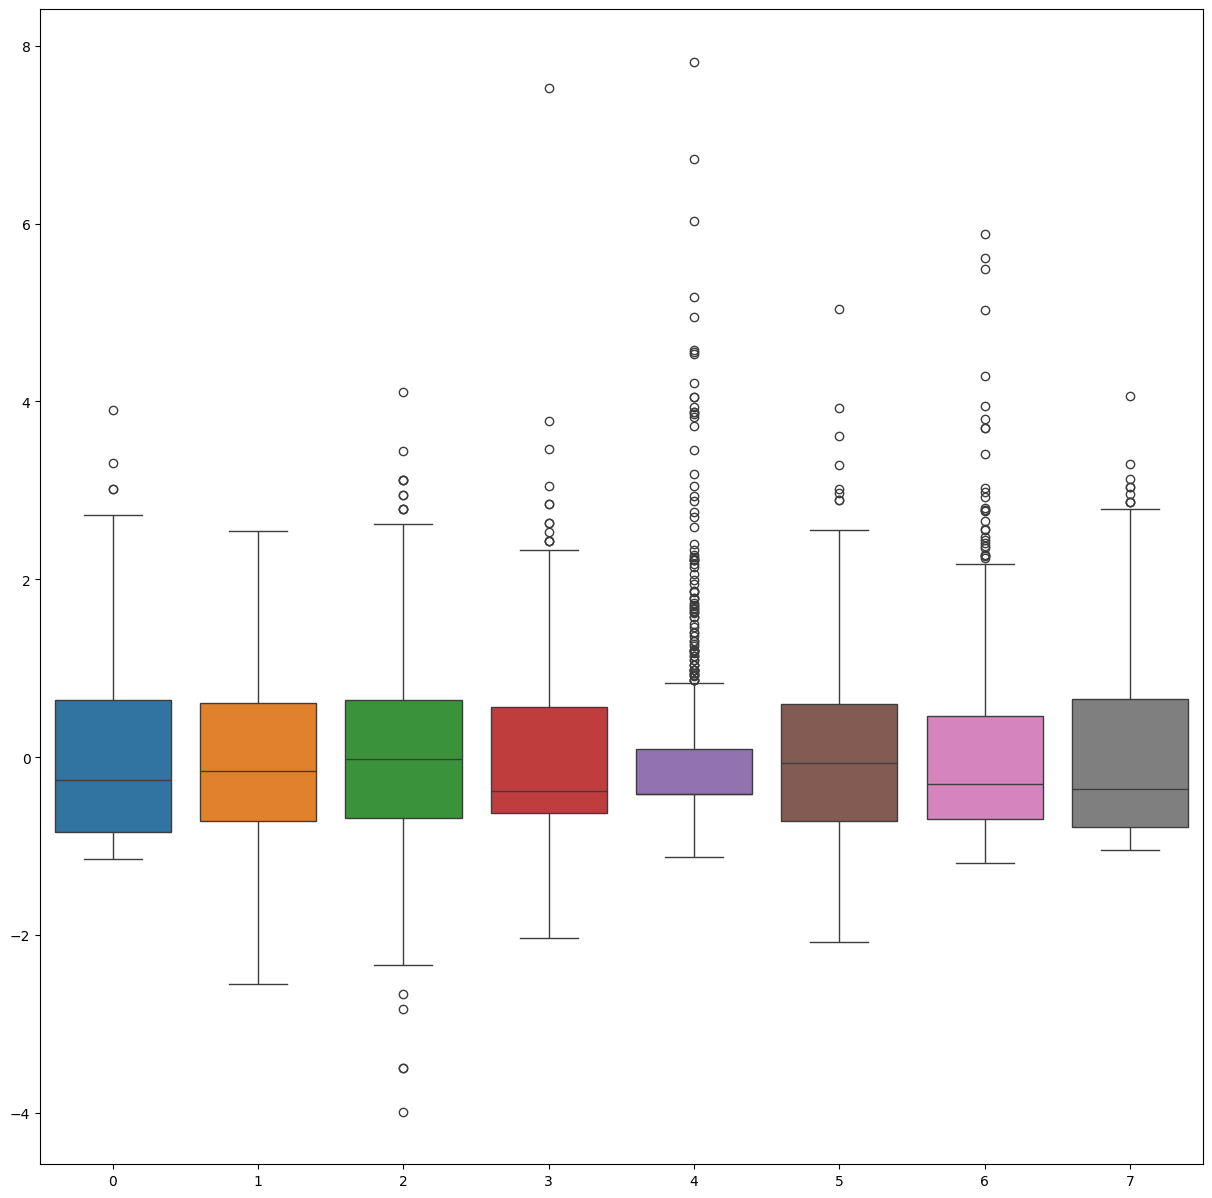

In [ ]:
fig, ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scaled, ax=ax)
plt.savefig("boxplot(scaled).jpg")
plt.show()

In [ ]:
X_scaled=pd.DataFrame(X_scaled)
X_scaled.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,1.156482e-17,2.868076e-16,-4.394633e-17,-3.168762e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-3.985352e+00,-2.037044e+00,-1.125139e+00,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.817623e-01,-6.306536e-01,-4.177681e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-2.104440e-02,-3.747004e-01,-4.177681e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.396735e-01,5.603676e-01,9.234424e-02,6.038797e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.108443e+00,7.521430e+00,7.819199e+00,5.042893e+00,5.883565e+00,4.063716e+00


In [ ]:
Y_outlierdetction.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
X_scaled.columns = X.columns
display(X_scaled.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205066,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.016662,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.073567,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.504422,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [ ]:
q=X_scaled['Insulin'].quantile(.93)
mask=X_scaled['Insulin']<q
dataNew=X_scaled[mask]
Y_outlierdetction=Y_outlierdetction[mask]


In [ ]:
dataNew.shape

(714, 8)

most of the neusense has been eliminated

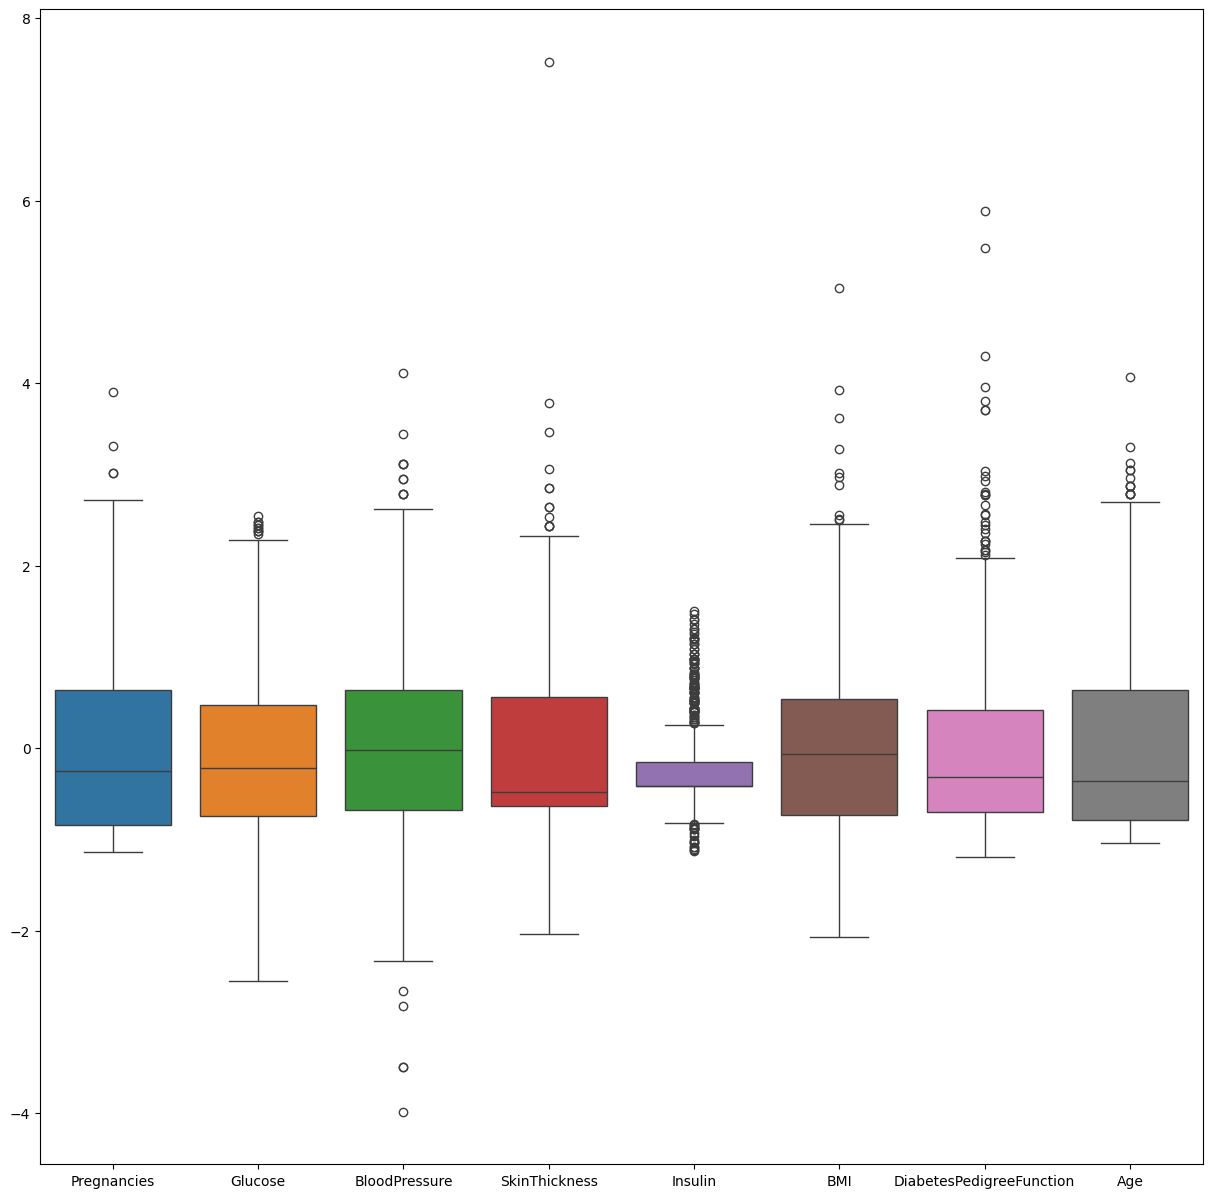

In [ ]:
fig, ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=dataNew, ax=ax)
plt.savefig("boxplot(scaled).jpg")
plt.show()

lets finally train our(communism intended) model comrades

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dataNew,Y_outlierdetction,test_size=0.33,random_state=42)

In [ ]:
X_train.shape

(478, 8)

In [ ]:
X_test.shape

(236, 8)

In [ ]:
Y_train.value_counts()

,count
Outcome,
0,306
1,172


A new concept in the books SMOTE for preventing overlearning or underlearning or any damn imbalance like that

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

##check the resampled class distribution
print(pd.Series(Y_train_resampled).value_counts())

Outcome
1    306
0    306
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(X_train_resampled,Y_train_resampled)

LogisticRegression()

In [ ]:
Y_prediction=classification.predict(X_test)

In [ ]:
print(Y_prediction)

[0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 0 0 0]


pehle istemal kare fir vishwas kare

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
target_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_prediction, target_names=target_names))
accuracy_score(Y_test,Y_prediction)

              precision    recall  f1-score   support

    Negative       0.89      0.78      0.83       168
    Positive       0.58      0.76      0.66        68

    accuracy                           0.78       236
   macro avg       0.74      0.77      0.75       236
weighted avg       0.80      0.78      0.78       236



0.7754237288135594

In [ ]:
import pickle
pickle.dump(classification,open("classification_model.pkl","wb"))

In [ ]:
classification_model=pickle.load(open("classification_model.pkl","rb"))
classification_model.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
##any changes will be welcomed if you genuinely want to contribute